# Breast Cancer Classification with Neural Network

### Details about breast Cancer

When the cells multiply and multiply in an uncontrolled way due to mutation caused in genes that regulate the growth of those cells, the condition termed as cancer. Cancer develops in breast cells known as breast cancer.

Breast cancer accounted for almost 25% of all cancer in recent years.

There are a few kinds of breast cancer that depends on which cells of the breast turn to cancer. The breast is mostly made up of three kinds of cells: lobules, ducts, and connective tissues. Lobules are the gland that produce milk, the tubes carrying the milk to the nipples are ducts. The connective tissue made up of mostly fatty and fibrous tissues, surrounds and holds everything together.

In most cases, the tumor forms in the lobules or duct cells, but can very seldom occur in the connective tissues. This uncontrolled cancer can sometimes travel and infect other healthy breast tissues as well as the lymph nodes under the arms.

![Image](https://techvidvan.com/tutorials/wp-content/uploads/sites/2/2021/08/breast-cancer-diagram.jpg)

Image Source: [ProjectGurukul](https://projectgurukul.org/breast-cancer-classification-using-machine-learning/)

The key to identify cancer is to identify tumors as malignant and benign, malignant being cancerous and benign being non-cancerous.

Early diagnosis of breast cancer can be very helpful and maybe even life-saving. We are going to build a system which can identify if the tumor is benign or malignant based on the features obtained from several cell images which are mostly based on the cell shape and its geometry. A digitized image of fine needle aspirate (FNA) of breast mass, a type of biopsy procedure used to obtain the features. They describe the characteristics of the cell nuclei present in the image.

### About Breast Cancer Classification Project

In this Machine learning project we are going to analyze and classify Breast Cancer (that the breast cancer belongs to which category), as basically there are two categories of breast cancer that is:

- Malignant type breast cancer
- Benign type breast cancer

So our main aim in this project is that with the help of a dataset we will create a model which will correctly classify whether the Breast Cancer is of malignant or benign type.

[Dataset Link](https://drive.google.com/file/d/1HQqUCF23fihnE3aCbx2MNPmER9o_If_m/view)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split

In [2]:
#loading the data from sklearn
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()

In [3]:
print(breast_cancer_dataset)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [4]:
#loading the data to dataframe
df = pd.DataFrame(breast_cancer_dataset.data, columns = breast_cancer_dataset.feature_names)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
#adding the target column to dataframe
df['target'] = breast_cancer_dataset.target

In [7]:
df.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [8]:
#number of rows and columns in dataframe
df.shape

(569, 31)

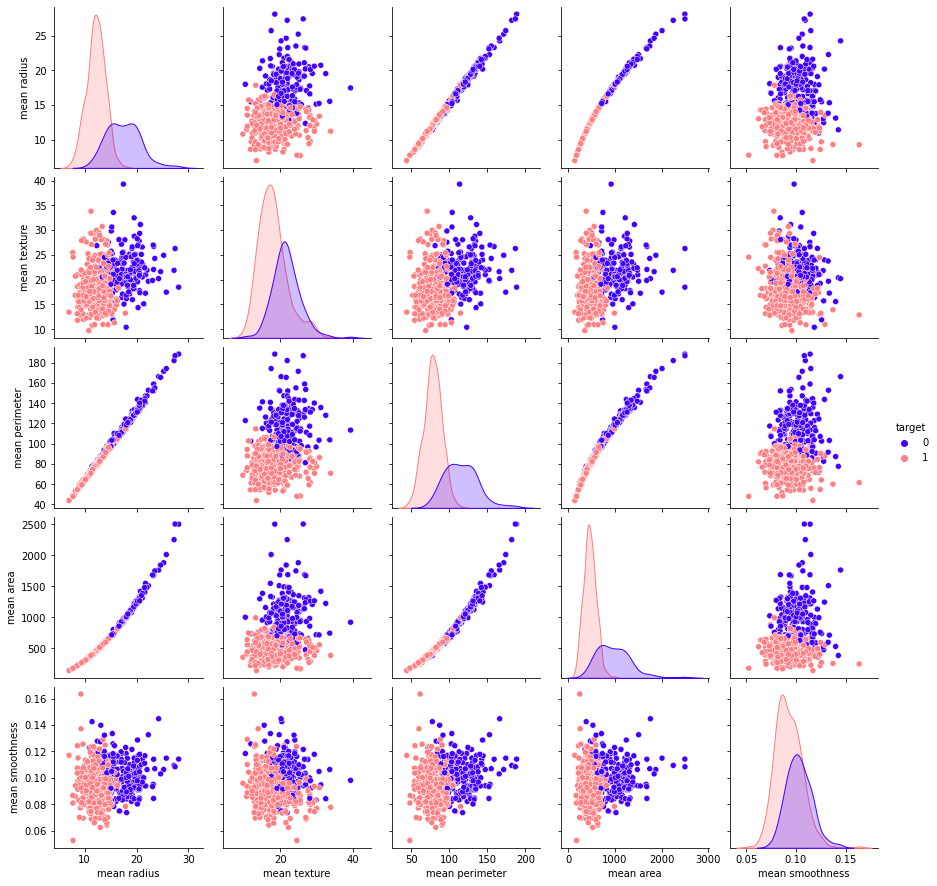

In [9]:
sns.pairplot(df, hue = 'target',palette='gnuplot2', vars = ['mean radius', 'mean texture', 'mean perimeter','mean area','mean smoothness'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [12]:
#statistical measures
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [13]:
#checking the distribution of target variiables
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

0 -- Malignant

1 -- Benign

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

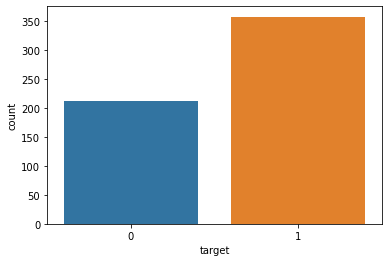

In [14]:
# visualize the count:
sns.countplot(df['target'], label = 'count')

In [15]:
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


We can see from that values for Malignant(0) is higher than Baingn(1).

Seperating the features and target

In [16]:
x = df.drop(columns = 'target', axis = 1)
y = df['target']

In [17]:
print(x)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [18]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: target, Length: 569, dtype: int32


Spliting the dataset into training and testing data

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 2)

In [20]:
print(x.shape, x_train.shape, x_test.shape)

(569, 30) (455, 30) (114, 30)


Standardize the data

In [21]:
from sklearn.preprocessing import StandardScaler

In [22]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std = scaler.transform(x_test)


In [23]:
print(x_train_std)

[[-0.01330339  1.7757658  -0.01491962 ... -0.13236958 -1.08014517
  -0.03527943]
 [-0.8448276  -0.6284278  -0.87702746 ... -1.11552632 -0.85773964
  -0.72098905]
 [ 1.44755936  0.71180168  1.47428816 ...  0.87583964  0.4967602
   0.46321706]
 ...
 [-0.46608541 -1.49375484 -0.53234924 ... -1.32388956 -1.02997851
  -0.75145272]
 [-0.50025764 -1.62161319 -0.527814   ... -0.0987626   0.35796577
  -0.43906159]
 [ 0.96060511  1.21181916  1.00427242 ...  0.8956983  -1.23064515
   0.50697397]]


Building the Neural network

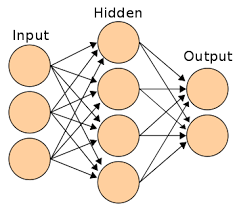

In [24]:
#importing tensorflow and keras

In [25]:
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras

In [26]:
#setting up the layers of Neural Network
model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(30,)),
                          keras.layers.Dense(20, activation = 'relu'),
                          keras.layers.Dense(2, activation = 'sigmoid')

])

# Flatten -> to convert the data into single dimensional array
# Dense -> all the neurons in the particular layers is connected to all the neurons from the previous layers

In [27]:
#compiling the neural network

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

We use Sparse Categorical Crossentropy for normal label encoding

We use Categorical Crossentropy for one-hot encoding

In [28]:
# training the neural network

history = model.fit(x_train_std, y_train, validation_split = 0.1, epochs = 10)


Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6140 - accuracy: 0.7237 - val_loss: 0.5019 - val_accuracy: 0.9130
Epoch 2/10
13/13 [==============================] - 0s 1ms/step - loss: 0.5039 - accuracy: 0.8484 - val_loss: 0.4106 - val_accuracy: 0.9783
Epoch 3/10
13/13 [==============================] - 0s 1ms/step - loss: 0.4139 - accuracy: 0.8900 - val_loss: 0.3340 - val_accuracy: 0.9783
Epoch 4/10
13/13 [==============================] - 0s 2ms/step - loss: 0.3436 - accuracy: 0.8998 - val_loss: 0.2740 - val_accuracy: 0.9783
Epoch 5/10
13/13 [==============================] - 0s 2ms/step - loss: 0.2879 - accuracy: 0.9193 - val_loss: 0.2315 - val_accuracy: 0.9783
Epoch 6/10
13/13 [==============================] - 0s 1ms/step - loss: 0.2470 - accuracy: 0.9242 - val_loss: 0.2020 - val_accuracy: 0.9783
Epoch 7/10
13/13 [==============================] - 0s 1ms/step - loss: 0.2170 - accuracy: 0.9340 - val_loss: 0.1811 - val_accuracy: 0.9783
Epoch 8/10
13/13 [=

Visualizing accuracy and loss

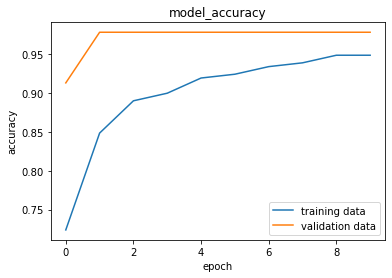

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

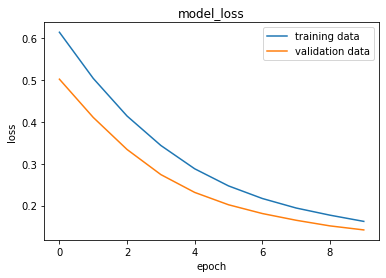

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model_loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [31]:
loss, accuracy = model.evaluate(x_test_std, y_test)
print(accuracy)

4/4 [==============================] - 0s 748us/step - loss: 0.1539 - accuracy: 0.9649
0.9649122953414917


In [32]:
print(loss)

0.15387628972530365


As we can see when accuracy is high loss is low because accuracy and loss are inversely proprtional to each other.

In [33]:
print(x_test_std.shape)

(114, 30)


In [34]:
print(x_test_std[0])

[-0.04462793 -1.41612656 -0.05903514 -0.16234067  2.0202457  -0.11323672
  0.18500609  0.47102419  0.63336386  0.26335737  0.53209124  2.62763999
  0.62351167  0.11405261  1.01246781  0.41126289  0.63848593  2.88971815
 -0.41675911  0.74270853 -0.32983699 -1.67435595 -0.36854552 -0.38767294
  0.32655007 -0.74858917 -0.54689089 -0.18278004 -1.23064515 -0.6268286 ]


In [35]:
y_pred = model.predict(x_test_std)

In [36]:
print(y_pred.shape)

(114, 2)


In [37]:
print(y_pred[0])

[0.2899001  0.47990012]


The above values shows the probability, as 0.35 gives probability of 0 and 0.50 gives probability of 1.

The model is 35% sure that it's a Malignanat but it's 50% sure that it's a Benign.

In [38]:
print(x_test_std)

[[-0.04462793 -1.41612656 -0.05903514 ... -0.18278004 -1.23064515
  -0.6268286 ]
 [ 0.24583601 -0.06219797  0.21802678 ...  0.54129749  0.11047691
   0.0483572 ]
 [-1.26115925 -0.29051645 -1.26499659 ... -1.35138617  0.269338
  -0.28231213]
 ...
 [ 0.72709489  0.45836817  0.75277276 ...  1.46701686  1.19909344
   0.65319961]
 [ 0.25437907  1.33054477  0.15659489 ... -1.29043534 -2.22561725
  -1.59557344]
 [ 0.84100232 -0.06676434  0.8929529  ...  2.15137705  0.35629355
   0.37459546]]


In [39]:
print(y_pred)

[[2.8990009e-01 4.7990012e-01]
 [3.4915841e-01 5.7023710e-01]
 [5.7585537e-03 9.0084577e-01]
 [9.8843062e-01 3.2318447e-05]
 [4.0448201e-01 3.5163796e-01]
 [9.0678877e-01 6.4362884e-03]
 [1.5366668e-01 7.5405085e-01]
 [5.9314668e-03 8.3639562e-01]
 [4.0334225e-02 8.3493233e-01]
 [3.7264198e-02 6.7530203e-01]
 [3.3171242e-01 4.3988559e-01]
 [7.0354164e-02 6.5502465e-01]
 [9.8597258e-02 7.2545290e-01]
 [1.7125335e-01 7.0050371e-01]
 [1.2539655e-02 8.7391388e-01]
 [7.9239947e-01 1.3787913e-01]
 [1.1880577e-02 7.8482664e-01]
 [6.6561341e-02 8.5550976e-01]
 [4.9929619e-02 8.0908537e-01]
 [7.9461432e-01 5.5087805e-03]
 [5.6455940e-02 3.8579810e-01]
 [1.0001212e-02 7.4160695e-01]
 [3.7493259e-02 8.0784070e-01]
 [6.5243244e-03 7.9425031e-01]
 [4.8937559e-02 5.8779031e-01]
 [8.0174959e-01 3.4372658e-02]
 [7.6486677e-02 5.9978610e-01]
 [1.6689399e-01 2.8901166e-01]
 [8.6074591e-01 7.5093031e-02]
 [8.5903668e-01 7.2736233e-02]
 [8.0233574e-02 4.4365668e-01]
 [5.3239495e-02 8.8037193e-01]
 [2.7101

model.predit() gives the prediction probability of each class for that data point

In [40]:
#argmax fuction

mylist = [0.25, 0.56]

index_of_max_value = np.argmax(mylist)
print(mylist)
print(index_of_max_value)



# Just of explanation purpose

[0.25, 0.56]
1


In [41]:
#convering the prediction probability of class label

y_pred_labels = [np.argmax(i) for i in y_pred]
print(y_pred_labels)

[1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]


Building the predictive system

In [42]:
input_data = (11.42,20.38,77.58,386.1,0.1425,0.2839,0.2414,0.1052,0.2597,0.09744,0.4956,1.156,3.445,27.23,0.00911,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.5,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.173)

#change input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardising the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print('The tumor is Malignanat')

else:
  print('The tumor is Benign')


[[0.7763934  0.00172949]]
[0]
The tumor is Malignanat


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Tip : Open the dataset link in Notepad and copy the digits from the data after M/B upto 30 values.
If you choose to go with data values after M the prediction should be shown by model as Malignanat and vice versa.

In [43]:
input_data = (11.45,20.97,73.81,401.5,0.1102,0.09362,0.04591,0.02233,0.1842,0.07005,0.3251,2.174,2.077,24.62,0.01037,0.01706,0.02586,0.007506,0.01816,0.003976,13.11,32.16,84.53,525.1,0.1557,0.1676,0.1755,0.06127,0.2762,0.08851)

#change input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

#reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

#standardising the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)

prediction_label = [np.argmax(prediction)]
print(prediction_label)

if (prediction_label[0] == 0):
  print('The tumor is Manignanat')

else:
  print('The tumor is Benign')

[[0.10591349 0.77380526]]
[1]
The tumor is Benign


C:\Users\Admin\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
